In [1]:
import sys 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
import warnings
import seaborn as sns
# To suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import standard scaler
from sklearn.preprocessing import StandardScaler

In [3]:
%load_ext autoreload
%autoreload 2
from database import Magneticum
from relation import Scaling
from relation import Distribution
from relation import Analysis
from relation import RandomForest
from relation import photoz

In [4]:
dist1 = Distribution(50,'140','',)
dist2 = Distribution(50,'116','',)
dist3 = Distribution(50,'096','',)

In [5]:
def get_v(dist):
    V_net_cluster = np.sqrt(dist.dataframe_clu['vx[km/s]']**2+dist.dataframe_clu['vy[km/s]']**2+dist.dataframe_clu['vz[km/s]']**2)
    _,_,_,V_net_recon = dist.velocity_gradient()
    return V_net_cluster, V_net_recon/1e5

In [6]:
Vc_1, Vr_1 = get_v(dist1)
Vc_2, Vr_2 = get_v(dist2)
Vc_3, Vr_3 = get_v(dist3)

In [14]:
dist1.z

0.032637493

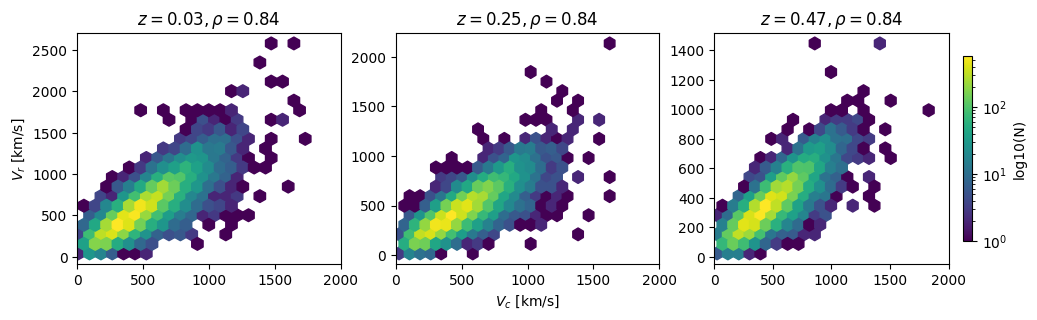

In [15]:
#plot hexabin plot subplot for each redshift shared x axis
bins = 'log'
grid = 20
fig, ax = plt.subplots(1,3,figsize=(12,3),sharex=True,width_ratios=[.9,.9,1])
ax[0].hexbin(Vc_1,Vr_1,gridsize=grid,cmap='viridis',bins=bins,mincnt=1)
ax[0].set_title(f'$z={dist1.z:.2f}, \\rho={np.corrcoef(Vc_1,Vr_1)[0][1]:.2f}$')
ax[0].set_ylabel('$V_{r}$ [km/s]')
ax[0].set_xlim(0,2000)
ax[1].hexbin(Vc_2,Vr_2,gridsize=grid,cmap='viridis',bins=bins,mincnt=1)
ax[1].set_xlim(0,2000)
ax[1].set_title(f'$z={dist2.z:.2f}, \\rho={np.corrcoef(Vc_2,Vr_2)[0][1]:.2f}$')
ax[1].set_xlabel('$V_{c}$ [km/s]')
hb = ax[2].hexbin(Vc_3,Vr_3,gridsize=grid,cmap='viridis',bins=bins,mincnt=1)
ax[2].set_title(f'$z={dist3.z:.2f}, \\rho={np.corrcoef(Vc_3,Vr_3)[0][1]:.2f}$')
ax[2].set_xlim(0,2000)
cb = fig.colorbar(hb,ax=ax[2],shrink=0.8)
cb.set_label('log10(N)')



[[1.         0.84388103]
 [0.84388103 1.        ]]


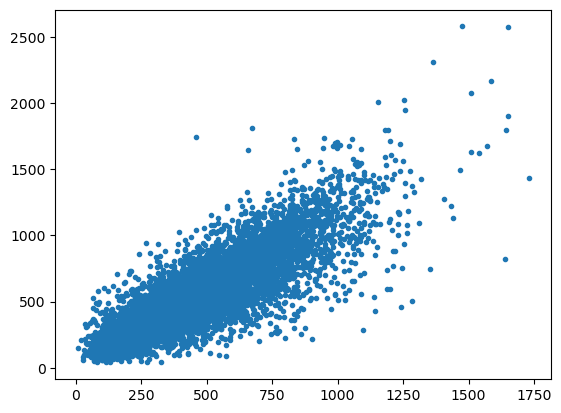

In [13]:
dist = Distribution(50,'140','',)
V_net_cluster = np.sqrt(dist.dataframe_clu['vx[km/s]']**2+dist.dataframe_clu['vy[km/s]']**2+dist.dataframe_clu['vz[km/s]']**2)
_,_,_,V_net_recon = dist.velocity_gradient()
plt.plot(V_net_cluster,V_net_recon/1e5,'.')
print(np.corrcoef(V_net_cluster,V_net_recon/1e5))


In [23]:
data = pd.DataFrame(np.array([V_net_cluster,V_net_recon/1e5]).T,)
data.columns = ['V_net_cluster','V_net_recon']

In [24]:
data

,V_net_cluster,V_net_recon
0,282.734776,868.535085
1,420.658838,845.329228
2,210.422788,281.216495
3,1151.476184,913.605896
4,283.361004,771.561215
...,...,...
10488,423.034247,486.691343
10489,313.121018,451.533229
10490,208.150635,302.706742
10491,646.156878,595.396973


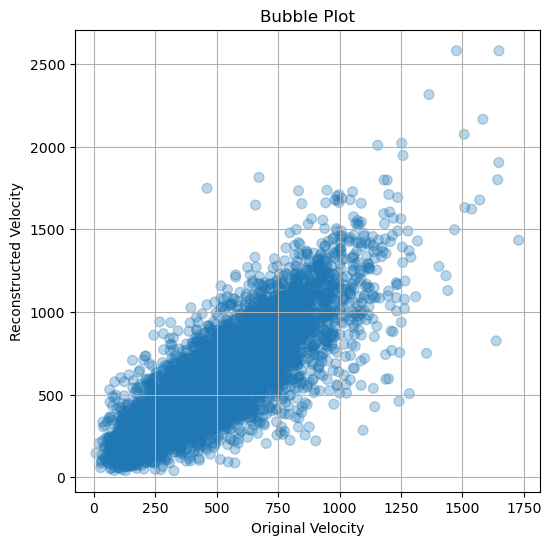

In [46]:
# plt.figure(figsize=(6, 6))
# sns.kdeplot(data=data, x='V_net_cluster', y='V_net_recon', fill=True, cmap="CMRmap")
# plt.title("Scatter Plot with Density Contours")
# plt.xlabel("Original Velocity")
# plt.ylabel("Reconstructed Velocity")
# plt.grid(True)
# plt.show()
# plt.hexbin(data['V_net_cluster'], data['V_net_recon'], gridsize=40,cmap='CMRmap',bins='log')
# plt.colorbar(label='Density')
# plt.title("Hexbin Plot")
# plt.xlabel("Original Velocity")
# plt.ylabel("Reconstructed Velocity")
# plt.grid(True)
# plt.show()
bubble_size = data.groupby(['V_net_cluster']).size().reset_index(name='Counts')
merged_data = pd.merge(data, bubble_size, on='V_net_cluster')

plt.figure(figsize=(6, 6))
plt.scatter(merged_data['V_net_cluster'], merged_data['V_net_recon'], s=merged_data['Counts']*50, alpha=0.3)
plt.title("Bubble Plot")
plt.xlabel("Original Velocity")
plt.ylabel("Reconstructed Velocity")
plt.grid(True)
plt.show()




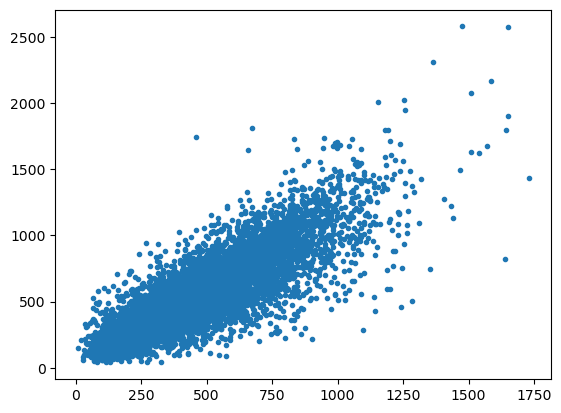

In [19]:
plt.plot(V_net_cluster,V_net_recon/1e5,'.')

In [10]:
a.bin_len/1000

10.0

In [6]:
best = {'max_depth': 50,
 'max_leaf_nodes': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [7]:
Magneticum.redshift_snapshot()

{'140': 0.032637493,
 '136': 0.066340191,
 '132': 0.10114286,
 '128': 0.1370814,
 '124': 0.17419289,
 '120': 0.2125156,
 '116': 0.25208907,
 '112': 0.29295412,
 '108': 0.3351529,
 '104': 0.37872894,
 '100': 0.4237272,
 '096': 0.47019408,
 '092': 0.51817753,
 '088': 0.56772704,
 '084': 0.61889372,
 '080': 0.67173035,
 '076': 0.72629144,
 '072': 0.78263327,
 '068': 0.84081395,
 '064': 0.9008935,
 '060': 0.9629339,
 '056': 1.0433395,
 '052': 1.1788951,
 '048': 1.3234434,
 '044': 1.4775811,
 '040': 1.7063538,
 '036': 1.9800821,
 '032': 2.3346161,
 '028': 2.79173}

In [8]:
snaps = ['140','132','120','096','076','060']

In [9]:
z = [Magneticum.redshift_snapshot(snap) for snap in snaps]

In [10]:
r2_scores = []
rmse_scores = []
for snap in snaps:
    a = Analysis(50,snap,'')
    df = a.get_dataframe()
    #df = data_manupulation(df)
    rf = RandomForest(df)
    rf.split_data(test_size=0.8)
    rf.best_hyperparameters = best
    rf.fit_with_hyperparameters(['M'],'Yksz')
    rf.fit_with_hyperparameters(['M','Vz'],'Yksz')
    rf.fit_with_hyperparameters(['M','Mstar'],'Yksz')
    rf.fit_with_hyperparameters(['M','Mstar','Vz'],'Yksz')
    r2_scores.append(rf.r2_scores)
    rmse_scores.append(rf.rmse_scores)


In [11]:
nsamples = []
for snap in snaps:
    a = Analysis(50,snap,'')
    df = a.get_dataframe()
    nsamples.append(len(df))

Text(0, 0.5, 'Number of samples')

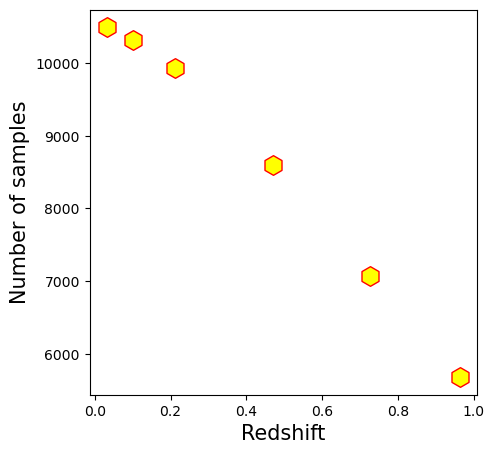

In [12]:
plt.figure(figsize=(5,5))
plt.scatter(z,nsamples,s=200,color='Yellow',marker='h',edgecolor='r')
plt.xlabel('Redshift', fontsize=15)
plt.ylabel('Number of samples', fontsize=15)

In [13]:
models = ['M','M_Vz','M_Mstar','M_Mstar_Vz']

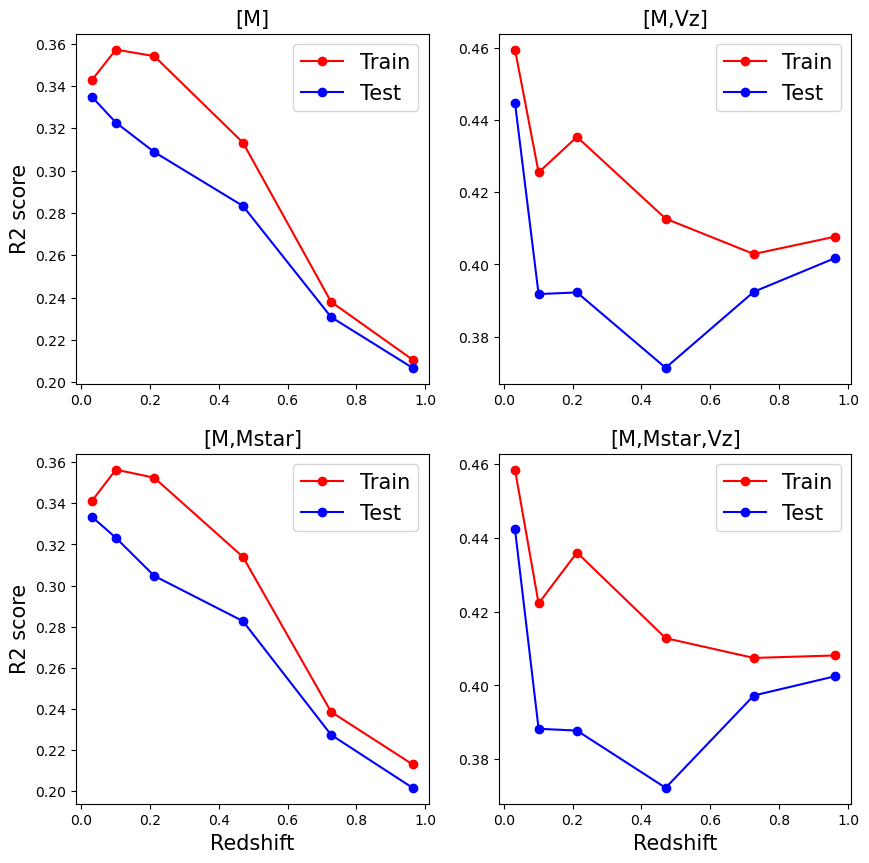

In [14]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    model = models[i]
    mname = '['+model.replace('_', ',')+']'
    r2_train = []
    r2_test = []
    for j in range(len(z)):
        r2_test.append(r2_scores[j][model]['test_r2'])
        r2_train.append(r2_scores[j][model]['train_r2'])
    plt.plot(z,r2_train,'o-',label='Train',color='r')
    plt.plot(z,r2_test,'o-',label='Test',color='b')
    if i in [2,3]:
        plt.xlabel('Redshift', fontsize=15)
    if i in [0,2]:
        plt.ylabel('R2 score', fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title(mname,fontsize=15)

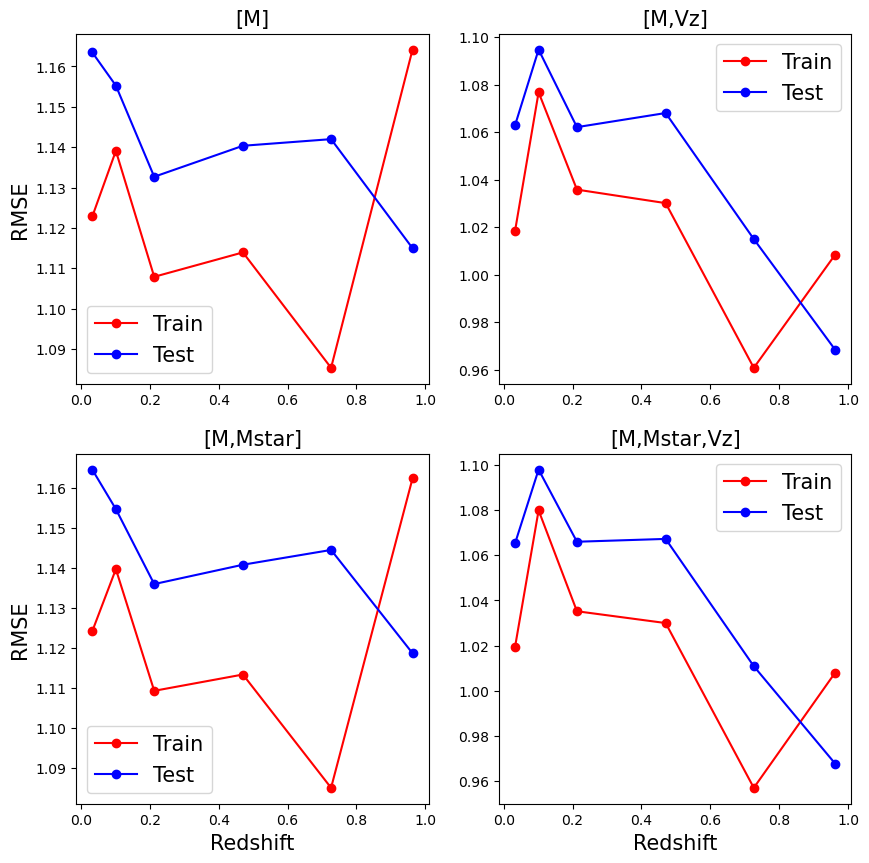

In [15]:
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    model = models[i]
    mname = '['+model.replace('_', ',')+']'
    rmse_train = []
    rmse_test = []
    for j in range(len(z)):
        rmse_test.append(rmse_scores[j][model]['test_rmse'])
        rmse_train.append(rmse_scores[j][model]['train_rmse'])
    plt.plot(z,rmse_train,'o-',label='Train',color='r')
    plt.plot(z,rmse_test,'o-',label='Test',color='b')
    if i in [2,3]:
        plt.xlabel('Redshift', fontsize=15)
    if i in [0,2]:
        plt.ylabel('RMSE', fontsize=15)
    plt.legend(loc='best',fontsize=15)
    plt.title(mname,fontsize=15)